In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nestle import sample

In [2]:
theta1_lin = np.linspace(0, 25, 1000)
theta2_lin = np.linspace(0, 25, 1000)

theta1_mesh, theta2_mesh = np.meshgrid(theta1_lin, theta2_lin)
likelihood_scan = np.cos(theta1_mesh) * np.cos(theta2_mesh)


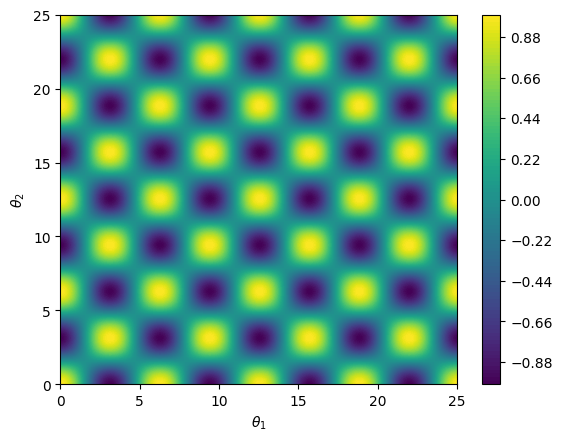

In [3]:
plt.contourf(theta1_mesh, theta2_mesh, likelihood_scan, levels=100)
plt.xlabel(r"$\theta_{{1}}$")
plt.ylabel(r"$\theta_{{2}}$")
plt.colorbar()

In [4]:
def loglike(x):
    return np.cos(x[0]) * np.cos(x[1])

def prior_transform(x):
    return 25*x  

res = sample(loglike, prior_transform, 2, npoints=10_000, method="multi")
print(res.summary())

niter: 17180
ncall: 45838
nsamples: 27180
logz:  0.125 +/-  0.003
h:  0.118


Text(0, 0.5, '$\\theta_{{2}}$')

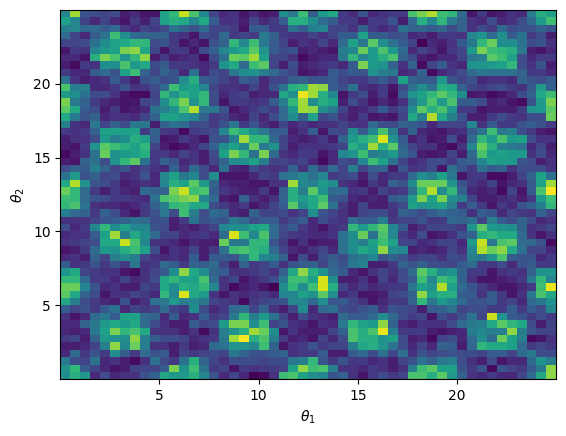

In [5]:
plt.hist2d(res.samples.T[0], res.samples.T[1], bins=50)
plt.xlabel(r"$\theta_{{1}}$")
plt.ylabel(r"$\theta_{{2}}$")

In [15]:
def prior_transform_gauss(x):
    return 6 * x

def logcirc(x, c, r, sigma):
    return np.log(1 / (2*np.pi*sigma**2)) * (- (np.linalg.norm(x - c) - r)**2 / (2 * sigma**2))

def loglike_gauss1(x):
    return logcirc(x, c=np.array([2.5, 3.1]), r=2, sigma=0.1)

res_gauss1 = sample(loglike_gauss1, prior_transform_gauss, 2, npoints=10_000, method="multi")
print(res_gauss1.summary())

niter: 38539
ncall: 132087
nsamples: 48539
logz: -2.937 +/-  0.016
h:  2.438


Text(0, 0.5, '$\\theta_{{2}}$')

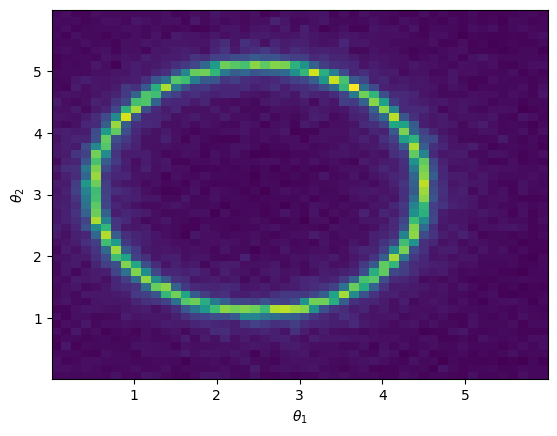

In [20]:
plt.hist2d(res_gauss1.samples.T[0], res_gauss1.samples.T[1], bins=50)
plt.xlabel(r"$\theta_{{1}}$")
plt.ylabel(r"$\theta_{{2}}$")

In [21]:
def loglike_gauss2(x):
    return np.logaddexp(
        logcirc(x, c=np.array([2.5, 3.1]), r=1, sigma=0.1),
        logcirc(x, c=np.array([3.1, 3.7]), r=1, sigma=0.1),
    )


res_gauss2 = sample(
    loglike_gauss2, prior_transform_gauss, 2, npoints=10_000, method="multi"
)
print(res_gauss2.summary())

niter: 43676
ncall: 146523
nsamples: 53676
logz: -2.939 +/-  0.016
h:  2.518


Text(0, 0.5, '$\\theta_{{2}}$')

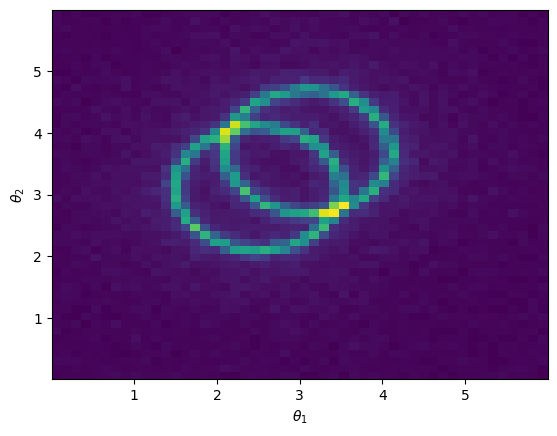

In [22]:
plt.hist2d(res_gauss2.samples.T[0], res_gauss2.samples.T[1], bins=50)
plt.xlabel(r"$\theta_{{1}}$")
plt.ylabel(r"$\theta_{{2}}$")

In [23]:
def loglike_gauss3(x):
    return np.logaddexp(
        logcirc(x, c=np.array([2.5, 3.1]), r=2, sigma=0.1),
        logcirc(x, c=np.array([2.7, 2.7]), r=1, sigma=0.1),
    )

res_gauss3 = sample(
    loglike_gauss3, prior_transform_gauss, 2, npoints=10_000, method="multi"
)
print(res_gauss3.summary())

niter: 34693
ncall: 115906
nsamples: 44693
logz: -2.553 +/-  0.014
h:  2.050


Text(0, 0.5, '$\\theta_{{2}}$')

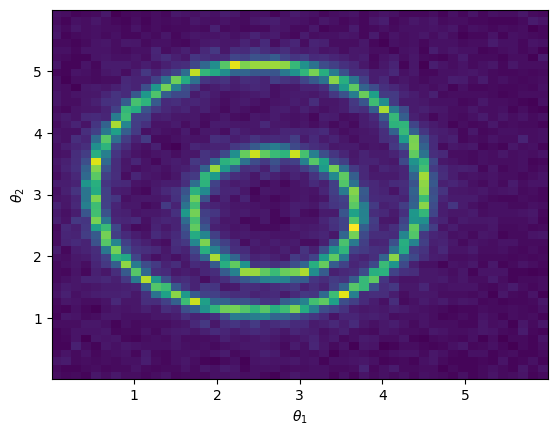

In [24]:
plt.hist2d(res_gauss3.samples.T[0], res_gauss3.samples.T[1], bins=50)
plt.xlabel(r"$\theta_{{1}}$")
plt.ylabel(r"$\theta_{{2}}$")